# Redes Neurais Convolucionais - Base de dados MNIST

## Modulo 10

### importações

In [ ]:
!pip install tensorflow==2.16.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 43.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 73.5 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.18.0
    Uninstalling tensorflow-2.18.0:
      Successfully uninstalled tensorflow-2.18.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.18.0 requires tensorflow<2.19,>=2.18, but you have tensorflow 2.16.1 w

In [ ]:
import tensorflow as tf
import keras
import matplotlib
import numpy as np

In [ ]:
tf.__version__, keras.__version__, matplotlib.__version__, np.__version__

('2.16.1', '3.8.0', '3.10.0', '1.26.4')

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras import utils as np_utils
import matplotlib.pyplot as plt


### divisão do dataset em treino e teste

In [ ]:
(X_treinamento, y_treinamento), (X_teste, y_teste) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
X_treinamento.shape, X_teste.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
# numero de pixels da imagem
28*28

784

In [ ]:
X_treinamento, X_treinamento.max()

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

In [ ]:
y_treinamento

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

### verificação dos dados

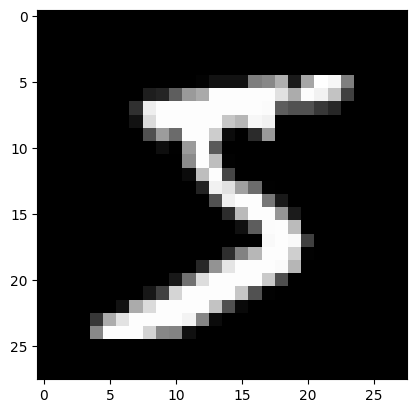

In [ ]:
plt.imshow(X_treinamento[0], cmap='gray')

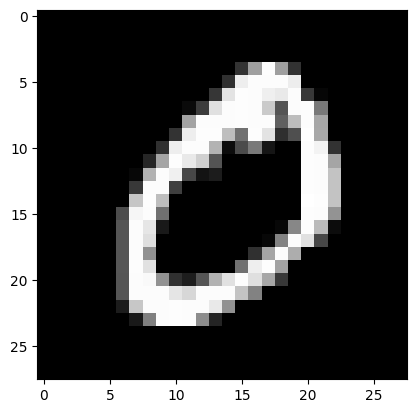

In [ ]:
plt.imshow(X_treinamento[1], cmap='gray')

### pré-processamento

In [ ]:
# adaptação do formato para imagens em escala de cinza
X_treinamento = X_treinamento.reshape(X_treinamento.shape[0], 28, 28, 1) # reshape(quantidade_imgs, linhas, colunas, canais_de_cor)
X_teste = X_teste.reshape(X_teste.shape[0], 28, 28, 1)

In [ ]:
X_treinamento.shape

(60000, 28, 28, 1)

In [ ]:
X_teste.shape

(10000, 28, 28, 1)

In [ ]:
# convertendo os dados numéricos para float32
X_treinamento = X_treinamento.astype('float32')
X_teste = X_teste.astype('float32')

In [ ]:
# normalizando para valores entre 0 e 1
X_treinamento /= 255
X_teste /= 255

In [ ]:
X_treinamento.max(), X_treinamento.min()

(1.0, 0.0)

In [ ]:
y_treinamento

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
y_teste

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
# aplicando one hot enconder nas saídas
# transformando o número inteiro em uma codificação binária de 10 elementos
y_treinamento = np_utils.to_categorical(y_treinamento, 10)
y_teste = np_utils.to_categorical(y_teste, 10)

In [ ]:
y_treinamento

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

### estrutura da rede neural

In [ ]:
rede_neural = Sequential()
rede_neural.add(InputLayer(input_shape=(28, 28, 1)))
rede_neural.add(Conv2D(filters = 32, kernel_size=(3, 3), activation='relu')) # Conv2D(quantidade_filtros, tamanhos_filtros, função_ativação)
rede_neural.add(MaxPooling2D(pool_size=(2, 2)))
rede_neural.add(Flatten())
rede_neural.add(Dense(units=128, activation='relu'))
rede_neural.add(Dropout(0.2))
rede_neural.add(Dense(units=10, activation='softmax'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [ ]:
rede_neural.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         692,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
rede_neural.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### treinamento do modelo

In [ ]:
rede_neural.fit(X_treinamento, y_treinamento,
                batch_size=128,
                epochs=5,
                validation_data=(X_teste, y_teste)
                )

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 39s 75ms/step - accuracy: 0.8674 - loss: 0.4711 - val_accuracy: 0.9758 - val_loss: 0.0817
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 35s 62ms/step - accuracy: 0.9749 - loss: 0.0861 - val_accuracy: 0.9819 - val_loss: 0.0518
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 29s 61ms/step - accuracy: 0.9834 - loss: 0.0550 - val_accuracy: 0.9836 - val_loss: 0.0469
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 62ms/step - accuracy: 0.9869 - loss: 0.0437 - val_accuracy: 0.9860 - val_loss: 0.0421
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 43s 66ms/step - accuracy: 0.9892 - loss: 0.0366 - val_accuracy: 0.9871 - val_loss: 0.0394


In [ ]:
resultado = rede_neural.evaluate(X_teste, y_teste)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9834 - loss: 0.0481


In [ ]:
resultado

[0.03942619264125824, 0.9871000051498413]

### Otimizando a rede neural

In [ ]:
rede_neural2 = Sequential()
rede_neural2.add(InputLayer(shape=(28, 28, 1)))

rede_neural2.add(Conv2D(filters = 32, kernel_size=(3, 3), activation='relu')) # Conv2D(quantidade_filtros, tamanhos_filtros, função_ativação)
rede_neural2.add(BatchNormalization())
rede_neural2.add(MaxPooling2D(pool_size=(2, 2)))

rede_neural2.add(Conv2D(filters = 32, kernel_size=(3, 3), activation='relu'))
rede_neural2.add(BatchNormalization())
rede_neural2.add(MaxPooling2D(pool_size=(2, 2)))

rede_neural2.add(Flatten())

rede_neural2.add(Dense(units=128, activation='relu'))
rede_neural2.add(Dropout(0.2))

rede_neural2.add(Dense(units=128, activation='relu'))
rede_neural2.add(Dropout(0.2))

rede_neural2.add(Dense(units=10, activation='softmax'))


In [ ]:
rede_neural2.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 26, 26, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 11, 11, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 11, 11, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 800)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 128)                 │         102,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 130,154 (508.41 KB)

 Trainable params: 130,026 (507.91 KB)

 Non-trainable params: 128 (512.00 B)

In [ ]:
rede_neural2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
rede_neural2.fit(X_treinamento, y_treinamento,
                batch_size=128,
                epochs=5,
                validation_data=(X_teste, y_teste)
                )

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 64s 129ms/step - accuracy: 0.8557 - loss: 0.4537 - val_accuracy: 0.9633 - val_loss: 0.1306
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 60s 128ms/step - accuracy: 0.9782 - loss: 0.0720 - val_accuracy: 0.9890 - val_loss: 0.0399
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 125ms/step - accuracy: 0.9861 - loss: 0.0472 - val_accuracy: 0.9898 - val_loss: 0.0355
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 126ms/step - accuracy: 0.9901 - loss: 0.0347 - val_accuracy: 0.9904 - val_loss: 0.0324
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 59s 125ms/step - accuracy: 0.9904 - loss: 0.0296 - val_accuracy: 0.9910 - val_loss: 0.0319


In [ ]:
resultado = rede_neural2.evaluate(X_teste, y_teste)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9885 - loss: 0.0422


In [ ]:
resultado

[0.031947627663612366, 0.9909999966621399]

### validação cruzada

In [ ]:
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
(X, y), (X_teste, y_teste) = mnist.load_data()

In [ ]:
X = X.reshape(X.shape[0], 28, 28, 1)
X_teste = X_teste.reshape(X_teste.shape[0], 28, 28, 1)

In [ ]:
X = X.astype('float32')
X_teste = X_teste.astype('float32')

In [ ]:
X /= 255
X_teste /= 255

In [ ]:
y = np_utils.to_categorical(y, 10)
y_teste = np_utils.to_categorical(y_teste, 10)

In [ ]:
resultados = []
for indice_treinamento, indice_teste in kfold.split(X, np.zeros(shape=(y.shape[0], 1))):
    print(f'Indice treinamento: {indice_treinamento} \t Indice teste: {indice_teste}')
    rede_neural = Sequential()
    rede_neural.add(InputLayer(shape=(28, 28, 1)))
    rede_neural.add(Conv2D(filters = 32, kernel_size=(3, 3), activation='relu')) # Conv2D(quantidade_filtros, tamanhos_filtros, função_ativação)
    rede_neural.add(MaxPooling2D(pool_size=(2, 2)))
    rede_neural.add(Flatten())
    rede_neural.add(Dense(units=128, activation='relu'))
    rede_neural.add(Dropout(0.2))
    rede_neural.add(Dense(units=10, activation='softmax'))

    rede_neural.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    rede_neural.fit(X[indice_treinamento], y[indice_treinamento],
                batch_size=128,
                epochs=5
    )
    precisao = rede_neural.evaluate(X[indice_teste], y[indice_teste])
    resultados.append(precisao[1])


Indice treinamento: [    0     1     2 ... 59996 59998 59999] 	 Indice teste: [    3     4     8 ... 59991 59993 59997]
Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 24s 60ms/step - accuracy: 0.8428 - loss: 0.5441
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 57ms/step - accuracy: 0.9704 - loss: 0.1024
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 23s 60ms/step - accuracy: 0.9812 - loss: 0.0651
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 40s 57ms/step - accuracy: 0.9855 - loss: 0.0470
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 42s 61ms/step - accuracy: 0.9886 - loss: 0.0364
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9836 - loss: 0.0683
Indice treinamento: [    1     2     3 ... 59996 59997 59999] 	 Indice teste: [    0     6     7 ... 59988 59990 59998]
Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 24s 60ms/step - accuracy: 0.8442 - loss: 0.5492
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 22s 60ms/step - accuracy: 0.9721 - loss: 0.0950
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 60ms/step - accuracy: 0.9805 - lo

In [ ]:
resultados

[0.984250009059906,
 0.9867500066757202,
 0.984000027179718,
 0.9860000014305115,
 0.9851666688919067]

## Data augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
gerador_treinamento = ImageDataGenerator(
    rotation_range=7,
    horizontal_flip=True,
    shear_range=0.2,
    height_shift_range=0.07,
    zoom_range=0.2
)

In [ ]:
gerador_teste = ImageDataGenerator()

In [ ]:
base_treinamento = gerador_treinamento.flow(X_treinamento, y_treinamento, batch_size=128)
base_teste = gerador_teste.flow(X_teste, y_teste, batch_size=128)

In [ ]:
rede_neural.fit(base_treinamento,
                #steps_per_epoch=60000/128,
                epochs=5,
                validation_data=base_teste
                #validation_steps=10000/128
                )

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 48s 101ms/step - accuracy: 0.8654 - loss: 0.4727 - val_accuracy: 0.9719 - val_loss: 0.0861
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 46s 99ms/step - accuracy: 0.9410 - loss: 0.1895 - val_accuracy: 0.9764 - val_loss: 0.0678
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 97ms/step - accuracy: 0.9529 - loss: 0.1548 - val_accuracy: 0.9814 - val_loss: 0.0588
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 46s 99ms/step - accuracy: 0.9560 - loss: 0.1421 - val_accuracy: 0.9818 - val_loss: 0.0522
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 45s 96ms/step - accuracy: 0.9603 - loss: 0.1280 - val_accuracy: 0.9799 - val_loss: 0.0577


# Módulo 11

# Base de Dados : Gatos x Cachorros

### importações

In [ ]:
!pip install tensorflow==2.16.1

In [2]:
import numpy as np
import tensorflow as tf

In [3]:
import tempfile
import zipfile

<TemporaryDirectory '/tmp/tmp8l44eqra'>


### base de dados

In [16]:
temp_dir = tempfile.TemporaryDirectory()
print(temp_dir)

<TemporaryDirectory '/tmp/tmp5wfdgmiv'>


In [17]:
with zipfile.ZipFile('/content/archive.zip', 'r') as zip_ref:
    zip_ref.extractall(temp_dir.name)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### estrutura da rede neural

In [8]:
classificador = Sequential()
classificador.add(InputLayer(shape=(64, 64, 3)))

classificador.add(Conv2D(32, (3, 3), activation='relu'))
classificador.add(BatchNormalization())
classificador.add(MaxPooling2D(pool_size=(2, 2)))


classificador.add(Conv2D(32, (3, 3), activation='relu'))
classificador.add(BatchNormalization())
classificador.add(MaxPooling2D(pool_size=(2, 2)))

classificador.add(Flatten())

classificador.add(Dense(units=128, activation='relu'))
classificador.add(Dropout(0.2))

classificador.add(Dense(units=128, activation='relu'))
classificador.add(Dropout(0.2))

classificador.add(Dense(units=1, activation='sigmoid'))

In [9]:
classificador.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 62, 62, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 29, 29, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         802,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 829,985 (3.17 MB)

 Trainable params: 829,857 (3.17 MB)

 Non-trainable params: 128 (512.00 B)

In [10]:
classificador.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### data augmentation

In [11]:
gerador_treinamento = ImageDataGenerator(
    rescale=1./255,
    rotation_range=7,
    horizontal_flip=True,
    shear_range=0.2,
    height_shift_range=0.07,
    zoom_range=0.2
)

In [21]:
gerador_teste = ImageDataGenerator(
    rescale=1./255
)

In [19]:
base_treinamento = gerador_treinamento.flow_from_directory(
    f'{temp_dir.name}/training_set/training_set',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

Found 8005 images belonging to 2 classes.


In [23]:
base_teste = gerador_teste.flow_from_directory(
    f'{temp_dir.name}/test_set/test_set',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

Found 2023 images belonging to 2 classes.


In [24]:
classificador.fit(base_treinamento,
                epochs=8,
                validation_data=base_teste,
                )

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/8
251/251 ━━━━━━━━━━━━━━━━━━━━ 83s 316ms/step - accuracy: 0.5634 - loss: 0.8971 - val_accuracy: 0.5151 - val_loss: 1.2671
Epoch 2/8
251/251 ━━━━━━━━━━━━━━━━━━━━ 78s 312ms/step - accuracy: 0.6150 - loss: 0.6629 - val_accuracy: 0.6668 - val_loss: 0.6126
Epoch 3/8
251/251 ━━━━━━━━━━━━━━━━━━━━ 78s 308ms/step - accuracy: 0.6459 - loss: 0.6122 - val_accuracy: 0.5497 - val_loss: 0.9657
Epoch 4/8
251/251 ━━━━━━━━━━━━━━━━━━━━ 83s 311ms/step - accuracy: 0.6766 - loss: 0.5965 - val_accuracy: 0.6466 - val_loss: 0.6178
Epoch 5/8
251/251 ━━━━━━━━━━━━━━━━━━━━ 79s 313ms/step - accuracy: 0.6972 - loss: 0.5654 - val_accuracy: 0.6846 - val_loss: 0.6365
Epoch 6/8
251/251 ━━━━━━━━━━━━━━━━━━━━ 86s 331ms/step - accuracy: 0.7261 - loss: 0.5438 - val_accuracy: 0.6693 - val_loss: 0.6003
Epoch 7/8
251/251 ━━━━━━━━━━━━━━━━━━━━ 78s 311ms/step - accuracy: 0.7310 - loss: 0.5283 - val_accuracy: 0.6574 - val_loss: 0.7015
Epoch 8/8
251/251 ━━━━━━━━━━━━━━━━━━━━ 77s 307ms/step - accuracy: 0.7526 - loss: 0.5107 - 

### previsao

In [60]:
imagem_teste = image.load_img(f'{temp_dir.name}/test_set/test_set/dogs/dog.4125.jpg', target_size=(64, 64))

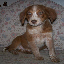

In [61]:
imagem_teste

In [62]:
imagem_teste = image.img_to_array(imagem_teste)

In [63]:
imagem_teste

array([[[ 76.,  77.,  82.],
        [ 75.,  76.,  81.],
        [ 75.,  76.,  81.],
        ...,
        [ 94., 106., 118.],
        [ 93., 105., 117.],
        [ 92., 104., 116.]],

       [[ 78.,  79.,  84.],
        [ 78.,  79.,  84.],
        [ 81.,  82.,  87.],
        ...,
        [ 97., 109., 121.],
        [100., 112., 124.],
        [ 98., 110., 122.]],

       [[ 78.,  79.,  81.],
        [ 79.,  80.,  82.],
        [ 79.,  80.,  82.],
        ...,
        [103., 115., 127.],
        [103., 115., 127.],
        [106., 118., 130.]],

       ...,

       [[ 78.,  77.,  73.],
        [ 68.,  67.,  63.],
        [ 65.,  64.,  60.],
        ...,
        [ 75.,  70.,  67.],
        [ 92.,  88.,  85.],
        [ 83.,  85.,  84.]],

       [[ 75.,  74.,  70.],
        [ 76.,  75.,  71.],
        [ 81.,  80.,  76.],
        ...,
        [ 89.,  91.,  86.],
        [ 84.,  86.,  81.],
        [ 92.,  92.,  92.]],

       [[ 71.,  73.,  70.],
        [ 81.,  81.,  79.],
        [ 83.,  

In [64]:
imagem_teste /= 255

In [65]:
imagem_teste

array([[[0.29803923, 0.3019608 , 0.32156864],
        [0.29411766, 0.29803923, 0.31764707],
        [0.29411766, 0.29803923, 0.31764707],
        ...,
        [0.36862746, 0.41568628, 0.4627451 ],
        [0.3647059 , 0.4117647 , 0.45882353],
        [0.36078432, 0.40784314, 0.45490196]],

       [[0.30588236, 0.30980393, 0.32941177],
        [0.30588236, 0.30980393, 0.32941177],
        [0.31764707, 0.32156864, 0.34117648],
        ...,
        [0.38039216, 0.42745098, 0.4745098 ],
        [0.39215687, 0.4392157 , 0.4862745 ],
        [0.38431373, 0.43137255, 0.47843137]],

       [[0.30588236, 0.30980393, 0.31764707],
        [0.30980393, 0.3137255 , 0.32156864],
        [0.30980393, 0.3137255 , 0.32156864],
        ...,
        [0.40392157, 0.4509804 , 0.49803922],
        [0.40392157, 0.4509804 , 0.49803922],
        [0.41568628, 0.4627451 , 0.50980395]],

       ...,

       [[0.30588236, 0.3019608 , 0.28627452],
        [0.26666668, 0.2627451 , 0.24705882],
        [0.25490198, 0

In [66]:
imagem_teste.shape

(64, 64, 3)

In [67]:
imagem_teste = np.expand_dims(imagem_teste, axis=0)

In [68]:
imagem_teste.shape

(1, 64, 64, 3)

In [69]:
previsao = classificador.predict(imagem_teste)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


In [70]:
previsao

array([[0.6253794]], dtype=float32)

In [71]:
base_treinamento.class_indices

{'cats': 0, 'dogs': 1}